In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [38]:
path = 'C:/Users/Jasonqian/data analysis with python/Customer Segmentation and Clustering/Mall_Customers.csv'
df = pd.read_csv(path)

In [39]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [40]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

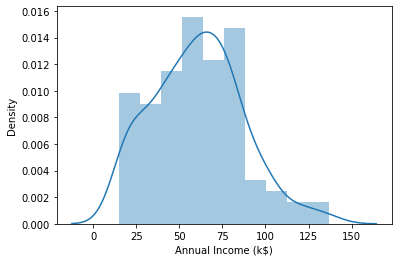

In [41]:
sns.distplot(df['Annual Income (k$)'])

In [42]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

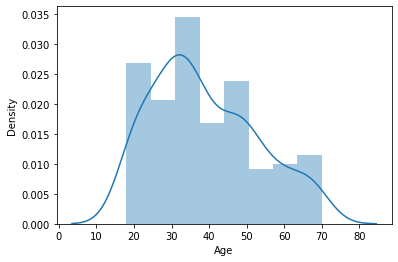

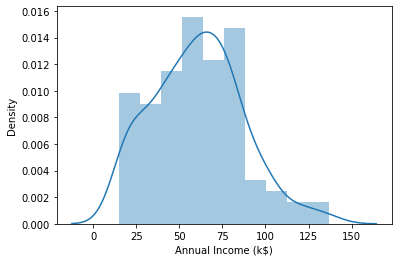

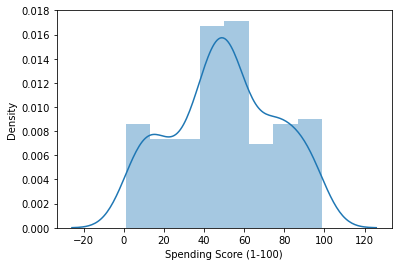

In [43]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

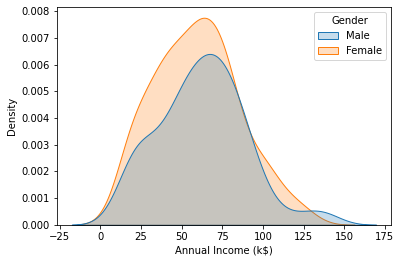

In [44]:
sns.kdeplot(df['Annual Income (k$)'], shade = True, hue = df['Gender'])

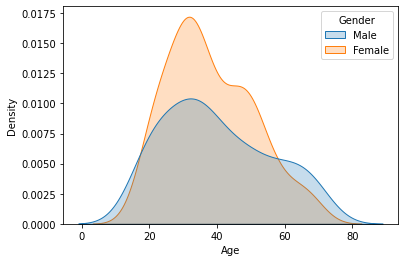

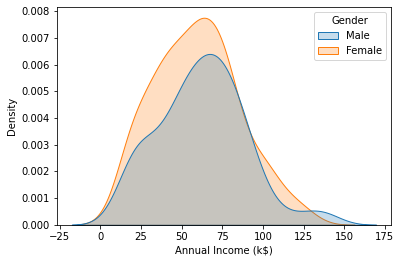

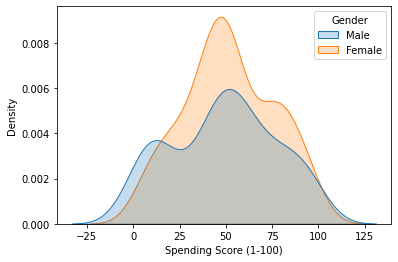

In [45]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i], shade = True, hue = df['Gender'])

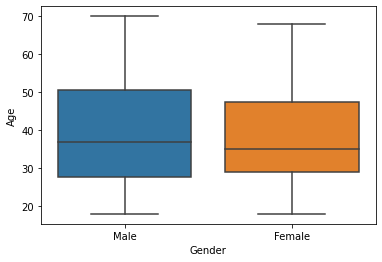

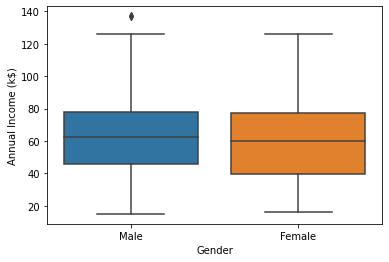

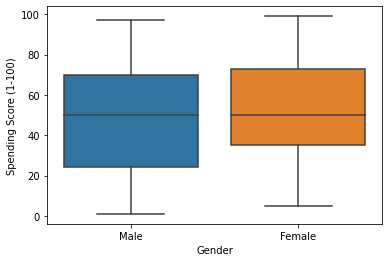

In [46]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data = df, x = 'Gender', y = df[i])

In [47]:
df['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

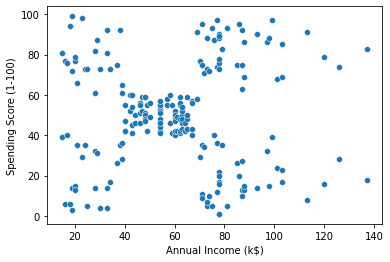

In [48]:
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)')

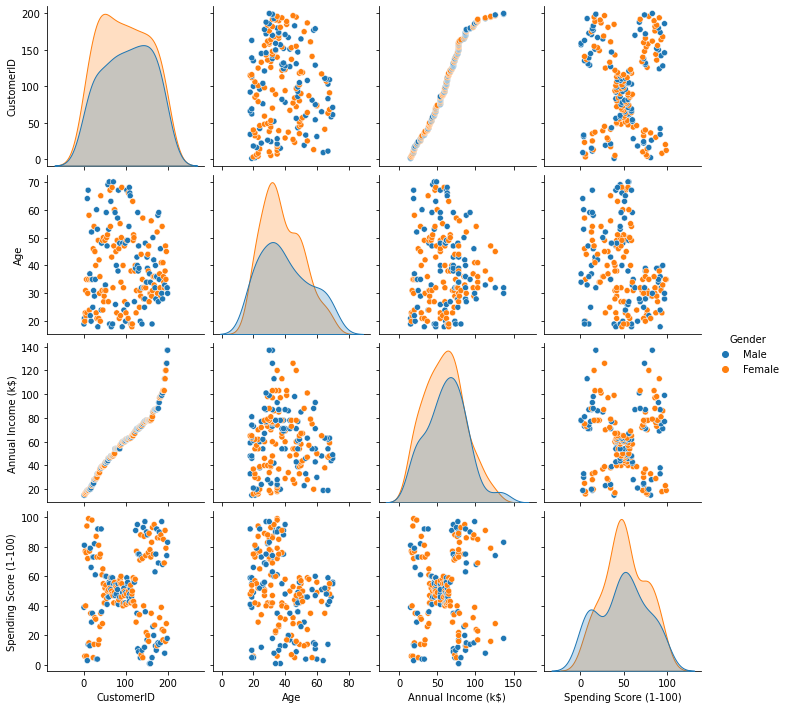

In [49]:
#df = df.drop('CustomerID', axis = 1)
sns.pairplot(df, hue = 'Gender')

In [50]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [51]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

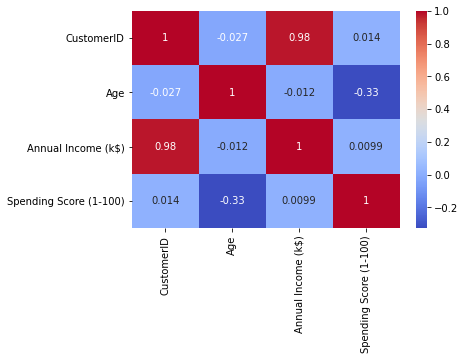

In [52]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

# Clustering - Univariate, Bivariate, Multivariate

In [53]:
clustering1 = KMeans()

In [54]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans()

In [55]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 7, 7,
       7, 7])

In [56]:
df['Income Cluster'] = clustering1.labels_

In [57]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [58]:
df['Income Cluster'].value_counts()

5    44
1    44
3    42
0    32
4    18
6    12
2     4
7     4
Name: Income Cluster, dtype: int64

In [59]:
clustering1.inertia_

3539.608946608947

In [60]:
inertia_score = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_score.append(kmeans.inertia_)

In [61]:
inertia_score

[137277.28000000003,
 49761.73701298701,
 24361.259213759207,
 13278.112713472487,
 8684.330924608817,
 5081.484660267269,
 4113.567099567101,
 3596.5477519556475,
 2388.1887279387283,
 1990.552139037433]

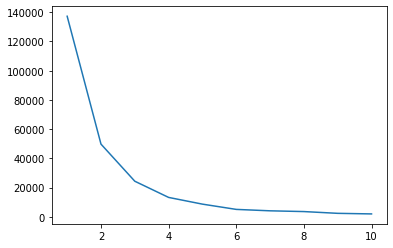

In [62]:
plt.plot(range(1,11), inertia_score)

In [63]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [64]:
clustering2 = KMeans(n_clusters = 3)

In [65]:
clustering2.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [66]:
clustering2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [67]:
df['Income Cluster'] = clustering2.labels_

In [68]:
df['Income Cluster'].value_counts()

2    90
0    74
1    36
Name: Income Cluster, dtype: int64

In [69]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


# Bivariate Clustering

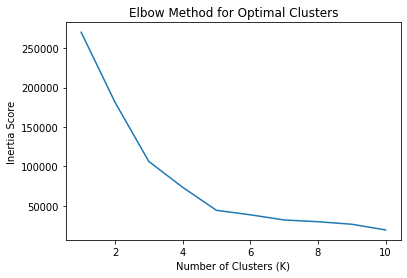

In [85]:
inertia_scores2 = []
for i in range(1,11):
    clustering3 = KMeans(n_clusters=i)
    clustering3.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(clustering3.inertia_)
    
plt.xlabel("Number of Clusters (K)")  
plt.ylabel("Inertia Score")           
plt.title("Elbow Method for Optimal Clusters")
plt.plot(range(1,11), inertia_scores2)

In [86]:
clustering4 = KMeans(n_clusters = 5)
clustering4.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Annual Income & Spending Score Cluster'] = clustering4.labels_

In [87]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Annual Income & Spending Score Cluster
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,0


In [88]:
centers = pd.DataFrame(clustering4.cluster_centers_)
centers.columns = ['x','y']

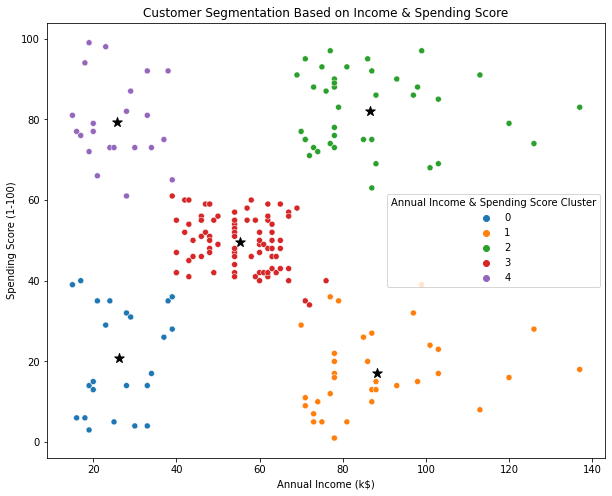

In [90]:
plt.figure(figsize = (10,8))
plt.scatter(x = centers['x'], y = centers['y'], s = 100, c = 'black', marker = '*')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Annual Income & Spending Score Cluster' , palette = 'tab10')
plt.title("Customer Segmentation Based on Income & Spending Score")
plt.show()

In [91]:
pd.crosstab(df['Annual Income & Spending Score Cluster'], df['Gender'], normalize = 'index')

Gender,Female,Male
Annual Income & Spending Score Cluster,,
0,0.608696,0.391304
1,0.457143,0.542857
2,0.538462,0.461538
3,0.592593,0.407407
4,0.590909,0.409091


In [92]:
df.groupby('Annual Income & Spending Score Cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Annual Income & Spending Score Cluster,,,
0,45.217391,26.304348,20.913043
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,42.716049,55.296296,49.518519
4,25.272727,25.727273,79.363636


# Multivariate clustering

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scale = StandardScaler()

In [77]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Annual Income & Spending Score Cluster
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,3


In [79]:
new_df = pd.get_dummies(df, drop_first = True)
new_df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Annual Income & Spending Score Cluster,Gender_Male
0,1,19,15,39,0,3,1
1,2,21,15,81,0,0,1
2,3,20,16,6,0,3,0
3,4,23,16,77,0,0,0
4,5,31,17,40,0,3,0
...,...,...,...,...,...,...,...
195,196,35,120,79,2,4,0
196,197,45,126,28,2,2,0
197,198,32,126,74,2,4,1
198,199,32,137,18,2,2,1


In [80]:
new_df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Annual Income & Spending Score Cluster',
       'Gender_Male'],
      dtype='object')

In [82]:
new_df = new_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
new_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [86]:
new_df = pd.DataFrame(scale.fit_transform(new_df))
new_df

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


In [117]:
new_df.columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']
new_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


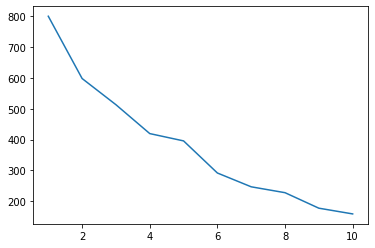

In [118]:
inertia_scores3 = []
for i in range(1,11):
    clustering5 = KMeans(n_clusters=i)
    clustering5.fit(new_df)
    inertia_scores3.append(clustering5.inertia_)
plt.plot(range(1,11), inertia_scores3)

In [120]:
clustering6 = KMeans(n_clusters = 4)
clustering6.fit(new_df)
new_df['mulvar cluster'] = clustering6.labels_

In [121]:
new_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,mulvar cluster
0,-1.424569,-1.738999,-0.434801,1.128152,0
1,-1.281035,-1.738999,1.195704,1.128152,0
2,-1.352802,-1.700830,-1.715913,-0.886405,2
3,-1.137502,-1.700830,1.040418,-0.886405,2
4,-0.563369,-1.662660,-0.395980,-0.886405,2


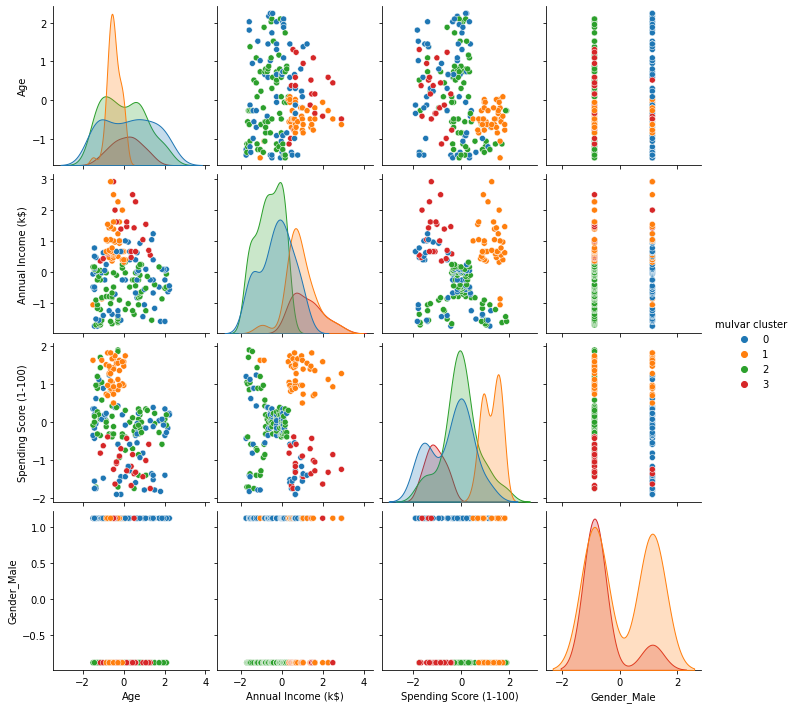

In [125]:
sns.pairplot(data = new_df, hue = 'mulvar cluster', palette = 'tab10')